### Danish

### Question Number 1

### Forward Pass in CNN

In [356]:
'''
Importing Library Statements
'''
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

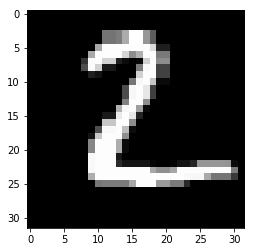

In [357]:
'''
Getting Image from MNIST dataset as it is of gray form so converting image to RGB
'''
from PIL import Image
img = Image.fromarray(X_test[1])
img = img.resize((32,32))
img = cv2.cvtColor(np.array(img),cv2.COLOR_GRAY2RGB)
plt.imshow(img)

### Input Image

In [379]:
'''
Returns Relu Function
'''
def RELU(Z):
    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)
    return A
'''
Returns Softmax Function
'''
def SOFTMAX(Z):
    max_each_col = Z.max(axis=0)
    e_z = np.exp(Z - max_each_col)
    softmax_Z = e_z / np.sum(e_z, axis=0)
    assert(softmax_Z.shape == Z.shape)
    return softmax_Z
'''
Returns Sigmoid Function
'''
def SIGMOID(Z):
    return 1 /(1+np.exp(-Z))

'''
Returns tanh Function
'''
def TANH(Z):
    return np.tanh(Z)

In [359]:
def scan(img,filter_,stride):
    '''
    This function convolutes over one channel and hence result is of (2D) M x N size
    '''
    new_ = np.zeros((int((img.shape[0]-filter_.shape[0])/stride+1),int((img.shape[1]-filter_.shape[1])/stride+1)))
    channel = img.shape[2]
    filter_row = filter_.shape[0]
    filter_colum = filter_.shape[1]
    for i in range(img.shape[0]-filter_.shape[0]+1):
        for j in range(img.shape[1]-filter_.shape[1]+1):
            sum_=0;
            for channel_no in range(channel):
                sum_+=np.sum(img[i:i+filter_row,j:j+filter_colum,channel_no]*filter_[:,:,channel_no])
            new_[i,j]=sum_
    return new_

In [360]:
def show_images_in_layer(images):
    '''
    We retrieve all channels and will plot one by one
    here sub will maintain plot number
    '''
    sub=1
    depth=images.shape[2]
    for i in range(depth):
        plt.subplot(1,depth,sub)
        plt.xticks([], [])  
        plt.yticks([], [])  
        plt.imshow(images[:,:,i])
        sub+=1
    plt.show()

In [361]:
def convolve(image,filters,filter_shape,stride):
    '''
    image with all layeres
    filters - number of filters
    filter_shape [m,n]
    
    '''
    result_output = np.zeros((int((image.shape[0]-filter_shape[0])/stride+1),int((image.shape[1]-filter_shape[1])/stride+1),filters))
    for i in range(filters):
        filter_ = np.random.randn(filter_shape[0],filter_shape[1],filter_shape[2])
        result = scan(image,filter_,stride)
        result_output[:,:,i]=result
    return result_output

In [362]:
def max_pool_single(img,filter_shape,stride):
    new_ = np.zeros((int((img.shape[0]-filter_shape[0])/stride+1),int((img.shape[1]-filter_shape[1])/stride+1)))
    filter_row = filter_shape[0]
    filter_colum = filter_shape[1]
    
    for i in range(0,img.shape[0],stride):
        for j in range(0,img.shape[1],stride):
            max_=np.max(img[i:i+filter_row,j:j+filter_colum])
            new_[int(i/stride),int(j/stride)]=max_
    return new_

In [363]:
def max_pooling(image,filter_shape,stride):
    '''
    image with all layers
    filter_shape [m,n]
    
    '''
    result_output = np.zeros((int((image.shape[0]-filter_shape[0])/stride+1),int((image.shape[1]-filter_shape[1])/stride+1),image.shape[2]))
    total_channels = image.shape[2]
    for i in range(total_channels):
        result = max_pool_single(image[:,:,i],filter_shape,stride)
        result_output[:,:,i]=result
    return result_output

Convolution layer1 Act-RELU
(28, 28, 6)


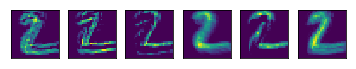

Max Pooling
(14, 14, 6)


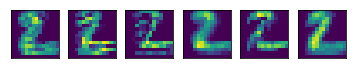

Convolution layer12 Act-RELU
(10, 10, 16)


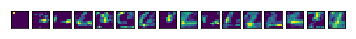

Max Pooling
(5, 5, 16)


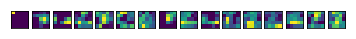

Fully Connected Layers

Layer1
Input - 400 Output - 120 Act-Relu

Layer2
Input - 120 Output - 84 Act-Relu

Output Layer
Input - 84 Output - 10 Act-Softmax

Result =  2


In [377]:
print("Convolution layer1 Act-RELU")
result = RELU(convolve(img,6,[5,5,3],1))
print(result.shape)
show_images_in_layer(result)

print("Max Pooling")
new_layer = max_pooling(result,[2,2],2)
print(new_layer.shape)
show_images_in_layer(new_layer)

print("Convolution layer12 Act-RELU")
result = RELU(convolve(new_layer,16,[5,5,6],1))
print(result.shape)
show_images_in_layer(result)

print("Max Pooling")
new_layer = max_pooling(result,[2,2],2)
print(new_layer.shape)
show_images_in_layer(new_layer)

flatted_image = new_layer.flatten()
flatted_image = flatted_image.reshape(flatted_image.shape[0],1)

print("Fully Connected Layers")
print()
print("Layer1")
print("Input - 400 Output - 120 Act-Relu")
W1 = np.random.randn(120,flatted_image.shape[0])
B1 = np.random.randn(120,1)
output_from_layer_1 = RELU(np.dot(W1,flatted_image)+B1)

print("\nLayer2")
print("Input - 120 Output - 84 Act-Relu")
W2 = np.random.randn(84,output_from_layer_1.shape[0])
B2 = np.random.randn(84,1)
output_from_layer_2 = RELU(np.dot(W2,output_from_layer_1)+B2)

print("\nOutput Layer")
print("Input - 84 Output - 10 Act-Softmax")
W3 = np.random.randn(10,output_from_layer_2.shape[0])
B3 = np.random.randn(10,1)
output = SOFTMAX(np.dot(W3,output_from_layer_2)+B3)
print("\nResult = ",np.argmax(output))

### Question Number 2

#### 1

Number of Parameters in 1st convolutional layer = filter shape x number of filters in 1st convolutional layer = 5 x 5 x 3 x 6 = 450

#### 2

Number of Parameters in pooling operation = 0

#### 3
Total Fully Connected layer parameters = (400 x 120 + 120) +(120 x 84 +84 )+ (84 x 10 +10)
Total COnvolution layer parameters = ( 5 x 5 x 3 x 6) + (5 x 5 x 6 x 16)

hence FC has more number of parameters

#### 4

Initital Convolutional layers consume most ammount of memory

#### 5
OBSERVATIONS FROM DIFFERENT ACTIVATION FUNCTIONS
#### SIGMOID


Convolution layer1 Act-Sigmoid
(28, 28, 6)


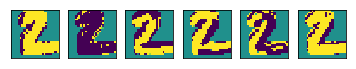

Max Pooling
(14, 14, 6)


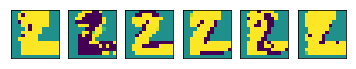

Convolution layer12 Act-Sigmoid
(10, 10, 16)


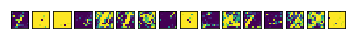

Max Pooling
(5, 5, 16)


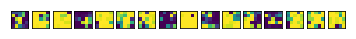

Fully Connected Layers

Layer1
Input - 400 Output - 120 Act-Sigmoid

Layer2
Input - 120 Output - 84 Act-Sigmoid

Output Layer
Input - 84 Output - 10 Act-Softmax

Result =  2


In [384]:
print("Convolution layer1 Act-Sigmoid")
result = SIGMOID(convolve(img,6,[5,5,3],1))
print(result.shape)
show_images_in_layer(result)

print("Max Pooling")
new_layer = max_pooling(result,[2,2],2)
print(new_layer.shape)
show_images_in_layer(new_layer)

print("Convolution layer12 Act-Sigmoid")
result = SIGMOID(convolve(new_layer,16,[5,5,6],1))
print(result.shape)
show_images_in_layer(result)

print("Max Pooling")
new_layer = max_pooling(result,[2,2],2)
print(new_layer.shape)
show_images_in_layer(new_layer)

flatted_image = new_layer.flatten()
flatted_image = flatted_image.reshape(flatted_image.shape[0],1)

print("Fully Connected Layers")
print()
print("Layer1")
print("Input - 400 Output - 120 Act-Sigmoid")
W1 = np.random.randn(120,flatted_image.shape[0])
B1 = np.random.randn(120,1)
output_from_layer_1 = SIGMOID(np.dot(W1,flatted_image)+B1)

print("\nLayer2")
print("Input - 120 Output - 84 Act-Sigmoid")
W2 = np.random.randn(84,output_from_layer_1.shape[0])
B2 = np.random.randn(84,1)
output_from_layer_2 = SIGMOID(np.dot(W2,output_from_layer_1)+B2)

print("\nOutput Layer")
print("Input - 84 Output - 10 Act-Softmax")
W3 = np.random.randn(10,output_from_layer_2.shape[0])
B3 = np.random.randn(10,1)
output = SOFTMAX(np.dot(W3,output_from_layer_2)+B3)
print("\nResult = ",np.argmax(output))

#### TANH

Convolution layer1 Act-tanh
(28, 28, 6)


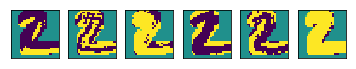

Max Pooling
(14, 14, 6)


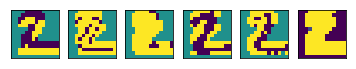

Convolution layer12 Act-tanh
(10, 10, 16)


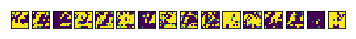

Max Pooling
(5, 5, 16)


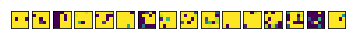

Fully Connected Layers

Layer1
Input - 400 Output - 120 Act-tanh

Layer2
Input - 120 Output - 84 Act-tanh

Output Layer
Input - 84 Output - 10 Act-Softmax

Result =  4


In [383]:
print("Convolution layer1 Act-tanh")
result = TANH(convolve(img,6,[5,5,3],1))
print(result.shape)
show_images_in_layer(result)

print("Max Pooling")
new_layer = max_pooling(result,[2,2],2)
print(new_layer.shape)
show_images_in_layer(new_layer)

print("Convolution layer12 Act-tanh")
result = TANH(convolve(new_layer,16,[5,5,6],1))
print(result.shape)
show_images_in_layer(result)

print("Max Pooling")
new_layer = max_pooling(result,[2,2],2)
print(new_layer.shape)
show_images_in_layer(new_layer)

flatted_image = new_layer.flatten()
flatted_image = flatted_image.reshape(flatted_image.shape[0],1)

print("Fully Connected Layers")
print()
print("Layer1")
print("Input - 400 Output - 120 Act-tanh")
W1 = np.random.randn(120,flatted_image.shape[0])
B1 = np.random.randn(120,1)
output_from_layer_1 = TANH(np.dot(W1,flatted_image)+B1)

print("\nLayer2")
print("Input - 120 Output - 84 Act-tanh")
W2 = np.random.randn(84,output_from_layer_1.shape[0])
B2 = np.random.randn(84,1)
output_from_layer_2 = TANH(np.dot(W2,output_from_layer_1)+B2)

print("\nOutput Layer")
print("Input - 84 Output - 10 Act-Softmax")
W3 = np.random.randn(10,output_from_layer_2.shape[0])
B3 = np.random.randn(10,1)
output = SOFTMAX(np.dot(W3,output_from_layer_2)+B3)
print("\nResult = ",np.argmax(output))